In [1]:
import networkx as nx
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity, plot_heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2.)

## 1) Erdős-Rényi

### Running simulations for various coupling strengths:

In [3]:
# Erdős-Rényi:
# The graph generated is a Binomial Graph with 'n'-nodes
# where the probability of an edge existing is 'p'

# Synchronization predicted quicker than other graphs due to simple nature

# Initializing the graph and finding its adjacency matrix
nxg = nx.erdos_renyi_graph(n=25, p=1, seed=22)
adj_mat = nx.to_numpy_array(nxg)

coupling = 0.5
dt = 0.01
T = 10
j = 0

fig, axs = plt.subplots(2,3, figsize=(14,10))
fig.suptitle('Kuramoto Synchronization Erdős-Rényi')

for j in range(6): 
    # Instantiate model with parameters, running the simulation and plotting
    model = Kuramoto(coupling, dt, T, n_nodes=len(adj_mat))
    sim = model.run(adj_mat)
    if j <= 2:
        axs[0,j].plot(np.sin(sim.T))
        axs[0,j].set_title(f"Coupling = {coupling}")
    else:
        axs[1,j%3].plot(np.sin(sim.T))
        axs[1,j%3].set_title(f"Coupling = {coupling}")
    coupling *= 1.75
    j += 1
    
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel=r'$\sin(\theta)$')
    
for ax in axs.flat:
    ax.label_outer()

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.savefig("./images/renyi_25_1.svg", dpi=1200)
plt.close(fig)

### Plotting order parameter to find global synchronization point:

True


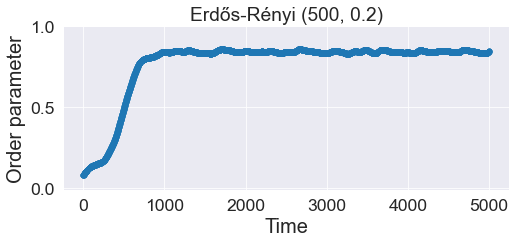

In [3]:
nxg = nx.erdos_renyi_graph(n=500, p=0.2)
print(nx.is_connected(nxg))
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=2.5, dt=0.01, T=50, n_nodes=len(nx.nodes(nxg)))
sim = model.run(adj_mat)

ax = plot_phase_coherence(sim)
ax.set_title('Erdős-Rényi (500, 0.2)');

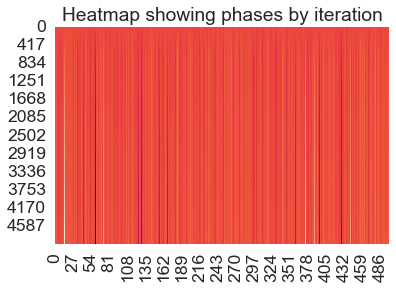

In [4]:
plot_heatmap(sim);

In [10]:
arr = sim.T[-1] % (2*np.pi)

In [16]:
for i in range(len(arr) - 1):
    print(arr[i+1])

3.6135464985746477
3.390672248924492
3.6474797539709125
3.418179966596295
2.6367807876205887
3.2791142556241866
3.248297217237305
3.1312304772766524
3.6974753522458705
3.6812758984910885
3.364968952639152
4.078568627088281
3.4513682131133976
1.6743394971610144
4.042458449538017
3.612019928688314
3.766459903282909
2.69846464087584
3.37083519620513
3.3145159905778137
3.5293515402930513
3.232186860482285
3.740089066495891
4.082611219717672
2.9646872058764746
3.3128134146941957
3.0177657154259734
2.2705525286800166
4.275881420143939
3.2048250065199824
3.1532658480553337
3.3968990211877923
3.353366220079392
2.200794415539943
2.758995584255037
3.9321758401592177
3.59087188073849
3.3128721255536577
3.553724663823944
3.5756933760006984
3.485714458989751
4.701892823804002
1.7675862577629537
2.6346554643334383
3.2579229885100585
4.124394197085863
3.9757469793942857
3.0032470063096035
3.1269690449522427
3.8636014681951423
3.402237969226446
3.1883268834497067
2.5882055800386787
2.768405545575825
3

In [50]:
Kuramoto.concentrated

False

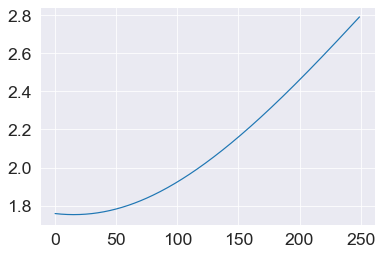

In [51]:
import pandas as pd
pd.DataFrame(sim.T[:250,:]).std(axis=1).plot();

## 2) Watts–Strogatz

### Running simulations for various coupling strengths:

In [6]:
# Watts–Strogatz:
# First creates a ring over 'n' nodes. 
# Then each node in the ring is joined to its 'k' nearest neighbors (or 'k-1' neighbors if  is odd). 
# Then shortcuts are created by replacing some edges as follows: 
# for each edge (u,v) in the underlying “n-ring with k nearest neighbors” 
# with probability p replace it with a new edge (u,w) with uniformly random choice of existing node w.

 
# Initializing the graph and finding its adjacency matrix
nxg = nx.watts_strogatz_graph(n=25, k=3, p=1, seed=22)
adj_mat = nx.to_numpy_array(nxg)

coupling = 0.5
dt = 0.01
T = 10
j = 0

fig, axs = plt.subplots(2,3, figsize=(14,10))
fig.suptitle('Kuramoto Synchronization Watts–Strogatz')

for j in range(6): 
    # Instantiate model with parameters, running the simulation and plotting
    model = Kuramoto(coupling, dt, T, n_nodes=len(adj_mat))
    sim = model.run(adj_mat)
    if j <= 2:
        axs[0,j].plot(np.sin(sim.T))
        axs[0,j].set_title(f"Coupling = {coupling}")
    else:
        axs[1,j%3].plot(np.sin(sim.T))
        axs[1,j%3].set_title(f"Coupling = {coupling}")
    coupling *= 1.75
    j += 1
    
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel=r'$\sin(\theta)$')
    
for ax in axs.flat:
    ax.label_outer()

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.savefig("./images/watts_25_2_1.svg", dpi=1200)
plt.close(fig)

### Plotting order parameter to find global synchronization point:

False


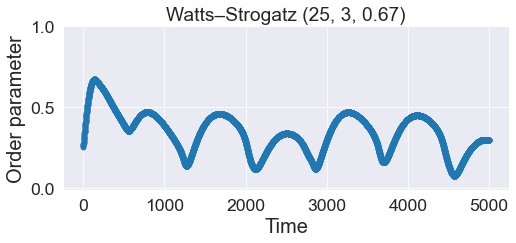

In [44]:
nxg = nx.watts_strogatz_graph(n=25, k=3, p=0.05, seed=22)
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=2.5, dt=0.01, T=50, n_nodes=len(adj_mat))
sim = model.run(adj_mat)
print(Kuramoto.concentrated)

plt = plot_phase_coherence(sim)
plt.set_title('Watts–Strogatz (25, 3, 0.67)');

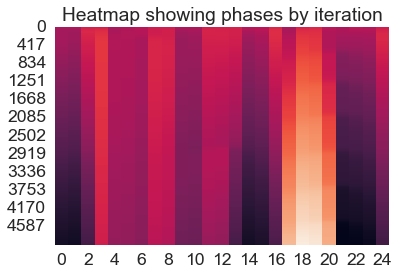

In [45]:
plot_heatmap(sim);

In [46]:
Kuramoto.concentrated

False

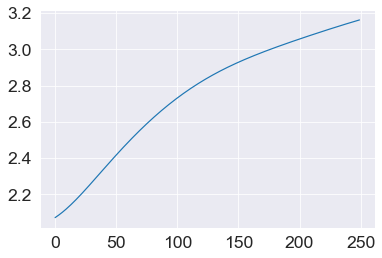

In [47]:
import pandas as pd
pd.DataFrame(sim.T[:250,:]).std(axis=1).plot();

### 3) Cyclic Graph

False


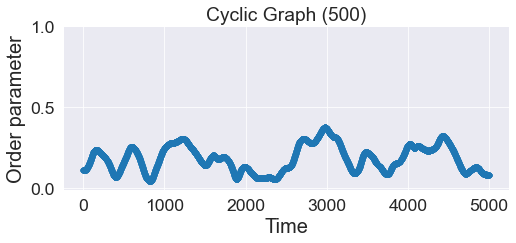

In [40]:
nxg = nx.cycle_graph(n=100)
natfreqs = np.repeat(2* np.pi * 0, len(nxg.nodes()))
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=2.5, dt=0.01, T=50, n_nodes=len(nx.nodes(nxg)))
sim = model.run(adj_mat)
print(Kuramoto.concentrated)

ax = plot_phase_coherence(sim)
ax.set_title('Cyclic Graph (500)');

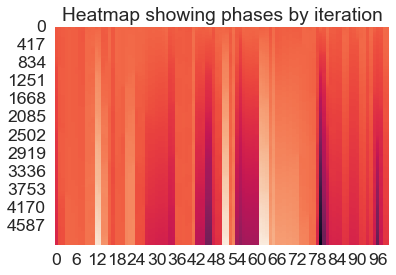

In [41]:
plot_heatmap(sim);

In [42]:
Kuramoto.concentrated

False

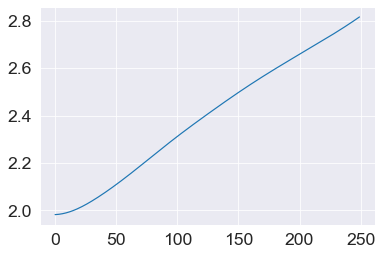

In [43]:
import pandas as pd
pd.DataFrame(sim.T[:250,:]).std(axis=1).plot();